## 01. Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Import Data

In [3]:
# define path:

path = r'/Users/piperdutcher/Documents/Achievement 4/04-2024 Instacart Basket Analysis'

In [4]:
# Import Data Set - Complete Data:

df_comp = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'combined_customer_order_product_data.pkl'))

In [9]:
# import data - departments
departments = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.pkl'))

In [ ]:
# more data if needed

## 03. Task

In [10]:
pd.set_option('display.max_columns', None)
df_comp.head()

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependents,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,mean_prod_price,spender_type,median_since_last_order,customer_frequency_type,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Busiest hours,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both


In [11]:
# Consider PII data: this can include first and last name. Will need to exclude these columns.
# will drop these columns, then save as new dataframe and conduct analysis on that moving forward.

df_comp_no_pii = df_comp.drop(columns = ['first_name','last_name'])

In [12]:
df_comp_no_pii.head()

,user_id,gender,state,age,date_joined,num_of_dependents,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,mean_prod_price,spender_type,median_since_last_order,customer_frequency_type,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Busiest hours,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both


In [13]:
# export data frame without PII
df_comp_no_pii.to_csv(os.path.join(path, '02 Data','Prepared Data', 'combined_customer_product_data_NO_PII.csv'))

In [14]:
# can eliminate first/last name because user_id column is unique and identifiable without compromising user privacy

In [15]:
# create regions for the states to create regional data:
# use loc() function, create a flag

# region 1 (Northeast): Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, Pennsylvania, New Jersey
# region 2 (Midwest): Wisconsin, Michigan, Illinois, Indiana, Ohio, North Dakota, South Dakota, Nebraska, Kansas, Minnesota, Iowa, Missouri
# region 3 (South): Delaware, Maryland, Disctrict of Columbia, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Kentucky, Tennessee, Mississippi, Alabama, Oklahoma, Texas, Arkansas, Louisiana
# region 4 (West) : Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, New Mexico, Alaska, Washington, Oregon, California, Hawaii

In [16]:
# create list of states in each region:

northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
southern_states = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
western_states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [17]:
# deriving columns with loc() EXAMPLE:

# dataframe.loc[dataframe['column'] *argument*, 'new_column'] = 'column flag/output'

df_comp_no_pii.loc[df_comp_no_pii['state'].isin(northeast_states), 'region'] = 'Northeast'
df_comp_no_pii.loc[df_comp_no_pii['state'].isin(midwest_states), 'region'] = 'Midwest'
df_comp_no_pii.loc[df_comp_no_pii['state'].isin(southern_states), 'region'] = 'South'
df_comp_no_pii.loc[df_comp_no_pii['state'].isin(western_states), 'region'] = 'West'

In [18]:
df_comp_no_pii.head()

,user_id,gender,state,age,date_joined,num_of_dependents,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,mean_prod_price,spender_type,median_since_last_order,customer_frequency_type,_merge,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Busiest hours,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest


In [19]:
# drop merge column, check counts of regional flags to make sure all states are accounted for:

df_comp_no_pii = df_comp_no_pii.drop(columns = ['_merge'])
df_comp_no_pii['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [25]:
# check spending habits, vs region (crossing the two variables)

crosstab = pd.crosstab(df_comp_no_pii['region'], df_comp_no_pii['spender_type'], dropna = False)

In [27]:
# crosstab to clipboard, saved to excel sheet
crosstab.to_clipboard()

In [28]:
#region	   High Spender	   Low Spender
#Midwest	155975	       7441350
#Northeast	108225	       5614511
#South	    209691	      10582194
#West	    160354	       8132559

# the south has the overall highest number of spenders, both high and low.

In [30]:
# create an exclusion flag for low-activity customers (less than 5 orders)
# exclude from data, then export this sample:

df_comp_no_pii.loc[df_comp_no_pii['max_order'] < 5, 'activity_level'] = 'low activity'
df_comp_no_pii.loc[df_comp_no_pii['max_order'] >= 5, 'activity_level'] = 'active'

df_comp_no_pii['activity_level'].value_counts(dropna = False)

activity_level
active          30964564
low activity     1440295
Name: count, dtype: int64

In [31]:
#drop low activity users, export this data set

df_comp_nopii_activeusers = df_comp_no_pii[df_comp_no_pii['activity_level'] == 'active']

In [33]:
# check to see that the new size of dataframe matches the total number of active users based on above flag:

df_comp_nopii_activeusers.shape

(30964564, 33)

In [1]:
# export new data set

df_comp_nopii_activeusers.to_pkl(os.path.join(path, '02 Data','Prepared Data', 'complete_data_nopii_activeusers.pkl'))

NameError: name 'df_comp_nopii_activeusers' is not defined

In [71]:
# create a profiling variable based on income & order habits
# use age, income, fam_status, dependents, department_id, (possibly order_day_of_week & order_hour_of_day
# customer_profile column outputs: 'single adult', 'young parent' 

In [65]:

departments.head(25)


department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [67]:
df_comp_nopii_activeusers['department_id'].value_counts(dropna = False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [50]:
df_comp_nopii_activeusers['num_of_dependents'].value_counts(dropna = False)

num_of_dependents
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [73]:
# earning brackets
# low earners: <45000
# middle earners: >= 45000 & <150000
# high earners: >=150000

df_comp_nopii_activeusers.loc[df_comp_nopii_activeusers['income'] < 45000, 'earning_level'] = 'low earning'
df_comp_nopii_activeusers.loc[(df_comp_nopii_activeusers['income'] >= 45000) & (df_comp_nopii_activeusers['income'] < 150000), 'earning_level'] = 'middle earning'
df_comp_nopii_activeusers.loc[df_comp_nopii_activeusers['income'] >= 150000, 'earning_level'] = 'high earning'

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_57441/2773546281.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_nopii_activeusers.loc[df_comp_nopii_activeusers['income'] < 45000, 'earning_level'] = 'low earning'


In [74]:
df_comp_nopii_activeusers.head()

,user_id,gender,state,age,date_joined,num_of_dependents,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,mean_prod_price,spender_type,median_since_last_order,customer_frequency_type,region,activity_level,earning_level
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,active,high earning
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,active,high earning
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,active,high earning
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,active,high earning
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Busiest hours,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,active,high earning


In [75]:
df_comp_nopii_activeusers['earning_level'].value_counts(dropna = False)

earning_level
middle earning    24550506
high earning       3895275
low earning        2518783
Name: count, dtype: int64

In [78]:
# customer_profiles:

# single young adult
# single middle aged adult
# single senior aged adult

# young adult parent
# middle aged parent
# senior aged parent

# single parent
# married no dependents

In [81]:
# single young adult
df_comp_nopii_activeusers.loc[(df_comp_nopii_activeusers['num_of_dependents'] == 0 ) & (df_comp_nopii_activeusers['fam_status'] != 'married')  & (df_comp_nopii_activeusers['age'] < 35 ), 'customer_profile'] = 'single young adult'

# single middle aged
df_comp_nopii_activeusers.loc[(df_comp_nopii_activeusers['num_of_dependents'] == 0 ) & (df_comp_nopii_activeusers['fam_status'] != 'married') & (df_comp_nopii_activeusers['age'] >= 35 ) & (df_comp_nopii_activeusers['age'] < 65 ), 'customer_profile'] = 'single middle aged adult'

# single senior aged
df_comp_nopii_activeusers.loc[(df_comp_nopii_activeusers['num_of_dependents'] == 0 ) & (df_comp_nopii_activeusers['fam_status'] != 'married')  & (df_comp_nopii_activeusers['age'] >= 65 ), 'customer_profile'] = 'single senior aged adult'

# young married parent
df_comp_nopii_activeusers.loc[(df_comp_nopii_activeusers['num_of_dependents'] > 0 ) & (df_comp_nopii_activeusers['fam_status'] == 'married') & (df_comp_nopii_activeusers['age'] < 35 ), 'customer_profile'] = 'married young parent'

# middle married parent
df_comp_nopii_activeusers.loc[(df_comp_nopii_activeusers['num_of_dependents'] > 0 ) & (df_comp_nopii_activeusers['fam_status'] == 'married') & (df_comp_nopii_activeusers['age'] >= 35 ) & (df_comp_nopii_activeusers['age'] < 65 ), 'customer_profile'] = 'married middle aged parent'

# senior married parent
df_comp_nopii_activeusers.loc[(df_comp_nopii_activeusers['num_of_dependents'] > 0 ) & (df_comp_nopii_activeusers['fam_status'] == 'married')  & (df_comp_nopii_activeusers['age'] >= 65 ), 'customer_profile'] = 'married senior aged parent'

# married, no dependents
df_comp_nopii_activeusers.loc[(df_comp_nopii_activeusers['num_of_dependents'] == 0 ) & (df_comp_nopii_activeusers['fam_status'] == 'married'), 'customer_profile'] = 'married, no dependents'

# single parent 
df_comp_nopii_activeusers.loc[(df_comp_nopii_activeusers['num_of_dependents'] > 0 ) & (df_comp_nopii_activeusers['fam_status'] != 'married'), 'customer_profile'] = 'single parent'


/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_57441/3212176775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_nopii_activeusers.loc[(df_comp_nopii_activeusers['num_of_dependents'] == 0 ) & (df_comp_nopii_activeusers['fam_status'] != 'married')  & (df_comp_nopii_activeusers['age'] < 35 ), 'customer_profile'] = 'single young adult'


In [82]:
df_comp_nopii_activeusers['customer_profile'].value_counts(dropna = False)

customer_profile
married middle aged parent    10872560
married senior aged parent     6173586
married young parent           4697565
single middle aged adult       3654165
single young adult             2063558
single senior aged adult       2021958
single parent                  1481172
Name: count, dtype: int64

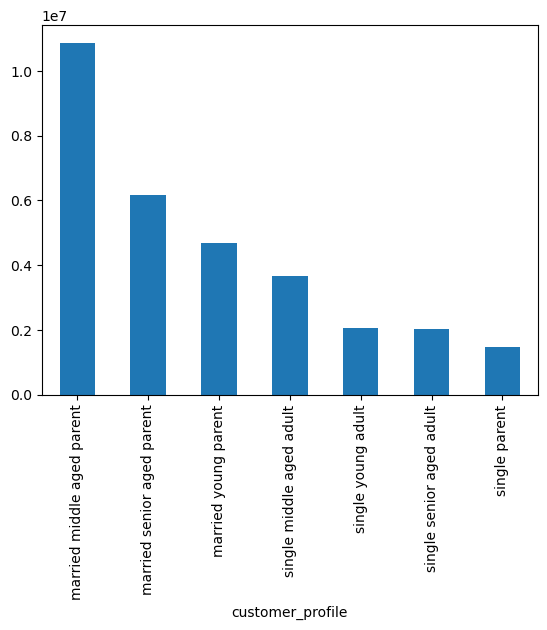

In [95]:
customer_profile_bar = df_comp_nopii_activeusers['customer_profile'].value_counts().plot.bar()

In [96]:
# export bar:

customer_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','customer_profile_bar.png'))

In [84]:
# customer profile aggregation (mean, max, median) for customer_frequency_type, average product price purchased
df_comp_nopii_activeusers.groupby('customer_profile').agg({'mean_prod_price':['mean','min','max']})

mean_prod_price                        
                                      mean       min           max
customer_profile                                                  
married middle aged parent       11.857158  1.000000   6983.593023
married senior aged parent       11.675617  1.262500   7414.485185
married young parent             12.499513  1.628571   5271.136842
single middle aged adult         12.102777  1.000000  15006.940000
single parent                    10.890167  2.133333  10209.987755
single senior aged adult         12.008598  1.308333  14042.512281
single young adult               12.194608  1.800000   8794.882427

In [85]:
# highest avg product purchase price is by married young parents, single young adults, single middle aged adult
# lowest avg product purchase price is by single parents (any age)

In [86]:
# create variable total_spent to see which customer profile has the highest avg total expenditure
# taking the sum of product prices for each individual user
df_comp_nopii_activeusers['total_spent'] = df_comp_nopii_activeusers.groupby(['user_id'])['prices'].transform(np.sum)

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_57441/3036234413.py:3: FutureWarning: The provided callable <function sum at 0x104673240> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_comp_nopii_activeusers['total_spent'] = df_comp_nopii_activeusers.groupby(['user_id'])['prices'].transform(np.sum)
/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_57441/3036234413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_nopii_activeusers['total_spent'] = df_comp_nopii_activeusers.groupby(['user_id'])['prices'].transform(np.sum)


In [87]:
df_comp_nopii_activeusers.groupby('customer_profile').agg({'total_spent':['mean','min','max']})

total_spent               
                                   mean   min      max
customer_profile                                      
married middle aged parent  3405.780272   7.0  22696.9
married senior aged parent  3398.255000   6.8  26394.9
married young parent        3444.691002  10.0  18448.1
single middle aged adult    3494.651778   5.0  24307.1
single parent               3459.618715  14.4  16048.1
single senior aged adult    3366.567973  15.7  17519.6
single young adult          3370.445442  10.5  18883.2

In [88]:
# single middle aged adults, single parents, and married young parent shave the highest average total expenditure

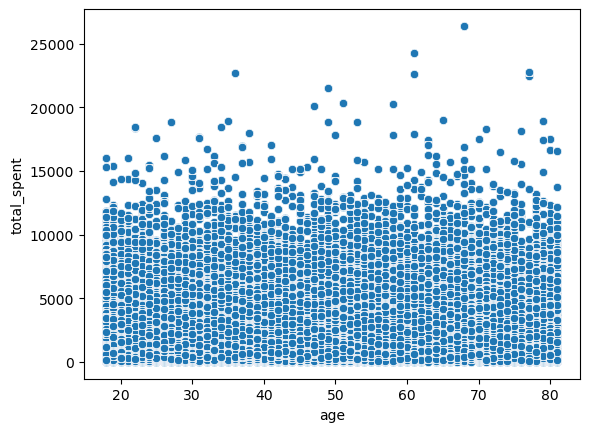

In [93]:
# checking to see if there is a correlation between total_spent and customer age

age_vs_totalspending_scatter = sns.scatterplot(x = 'age', y = 'total_spent',data = df_comp_nopii_activeusers)

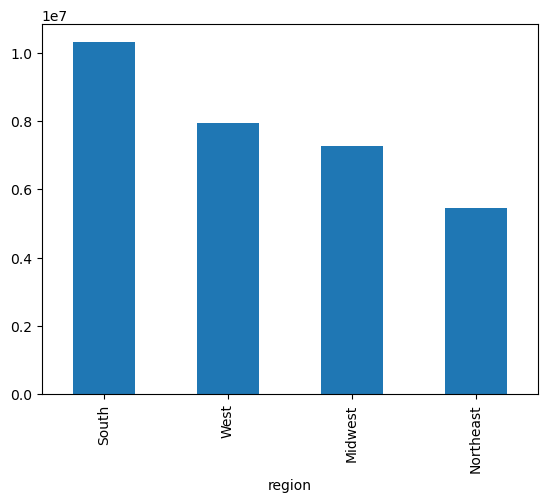

In [92]:
region_bar = df_comp_nopii_activeusers['region'].value_counts().plot.bar()

In [94]:
# export last two figures:

region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','region_bar.png'))
age_vs_totalspending_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','age_vs_totalspending_scatter.png'))

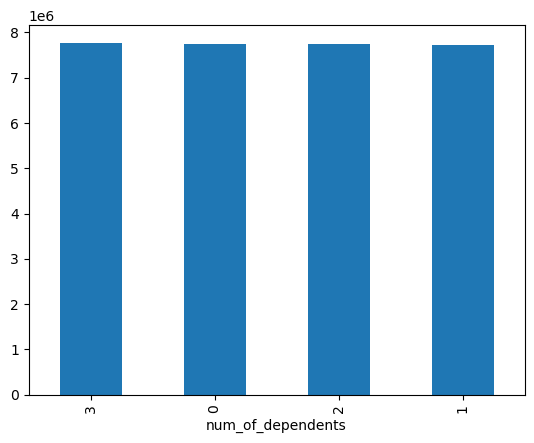

In [97]:
# bar chart for num_of_dependents

dependents_bar = df_comp_nopii_activeusers['num_of_dependents'].value_counts().plot.bar()

In [98]:
df_comp_nopii_activeusers['num_of_dependents'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: num_of_dependents, dtype: float64

<Axes: ylabel='Frequency'>

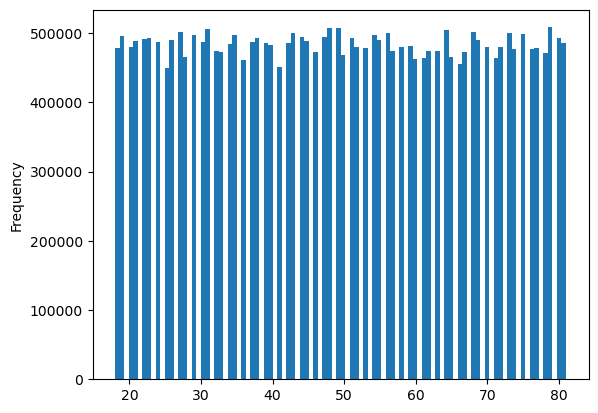

In [99]:
df_comp_nopii_activeusers['age'].plot.hist(bins = 100)

In [100]:
df_comp_nopii_activeusers['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [101]:
df_comp_nopii_activeusers['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [102]:
df_comp_nopii_activeusers.groupby('region').agg({'total_spent':['mean','min','max']})

total_spent              
                  mean  min      max
region                              
Midwest    3358.504028  7.0  26394.9
Northeast  3438.609495  7.7  22777.9
South      3424.804206  6.8  24307.1
West       3450.734085  5.0  18910.0

In [103]:
df_comp_nopii_activeusers.groupby('region').agg({'mean_prod_price':['mean','min','max']})

mean_prod_price                      
                     mean     min           max
region                                         
Midwest         12.681835  1.0000   8794.882427
Northeast       11.542582  1.1000   7414.485185
South           12.118845  1.2625  15006.940000
West            11.276491  1.0000  10209.987755

In [104]:
df_comp_nopii_activeusers.groupby('region').agg({'income':['mean','min','max']})

income               
                    mean    min     max
region                                 
Midwest    100380.647818  25903  579397
Northeast   99745.286352  26095  584097
South       99242.561807  25911  591089
West        99546.021028  25937  593901

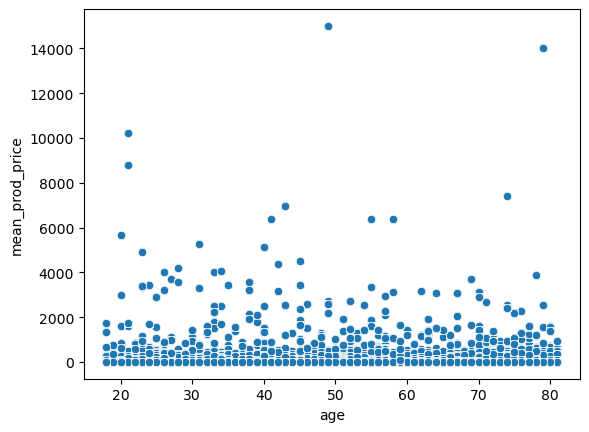

In [106]:
age_vs_prodprice_scatter = sns.scatterplot(x = 'age', y = 'mean_prod_price',data = df_comp_nopii_activeusers)

In [107]:
# export last figure:
age_vs_prodprice_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','age_vs_prodprice_scatter.png'))

In [109]:
df_comp_nopii_activeusers.groupby('customer_profile').agg({'days_since_prior_order':['mean','min','max']})

days_since_prior_order           
                                             mean  min   max
customer_profile                                            
married middle aged parent              10.835578  0.0  30.0
married senior aged parent              10.799413  0.0  30.0
married young parent                    10.815045  0.0  30.0
single middle aged adult                10.746304  0.0  30.0
single parent                           10.750995  0.0  30.0
single senior aged adult                10.768514  0.0  30.0
single young adult                      10.895824  0.0  30.0

In [110]:
df_comp_nopii_activeusers.groupby('customer_profile').agg({'total_spent':['mean','min','max']})

total_spent               
                                   mean   min      max
customer_profile                                      
married middle aged parent  3405.780272   7.0  22696.9
married senior aged parent  3398.255000   6.8  26394.9
married young parent        3444.691002  10.0  18448.1
single middle aged adult    3494.651778   5.0  24307.1
single parent               3459.618715  14.4  16048.1
single senior aged adult    3366.567973  15.7  17519.6
single young adult          3370.445442  10.5  18883.2

In [111]:
df_comp_nopii_activeusers.groupby('customer_profile').agg({'income':['mean','min','max']})

income               
                                     mean    min     max
customer_profile                                        
married middle aged parent  106943.530881  25941  592409
married senior aged parent  115738.060615  29001  593901
married young parent         70464.216917  25911  392552
single middle aged adult    107346.375114  25903  584097
single parent                70870.404339  25937  396364
single senior aged adult    116273.925759  29011  576876
single young adult           70658.066656  25979  387860

In [117]:
df_comp.shape

(32404859, 34)